In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta = np.linalg.lstsq(X,happiness,rcond=None)[0]

In [3]:
gridResolution = 100

In [4]:
intercepts = np.linspace(0,80,gridResolution)
slopes = np.linspace(0,6,gridResolution)

In [5]:
SSEs = np.zeros((len(intercepts),len(slopes)))

In [6]:
for inti in range(len(intercepts)):
  for slopei in range(len(slopes)):

    # model-predicted data
    yHat = X @ np.array([intercepts[inti],slopes[slopei]]).T

    # sum of squared errors
    SSEs[inti,slopei] = np.sum((yHat-happiness)**2)

In [7]:
i,j = np.unravel_index( np.argmin(SSEs),SSEs.shape )
empIntercept,empSlope = intercepts[i], slopes[j]

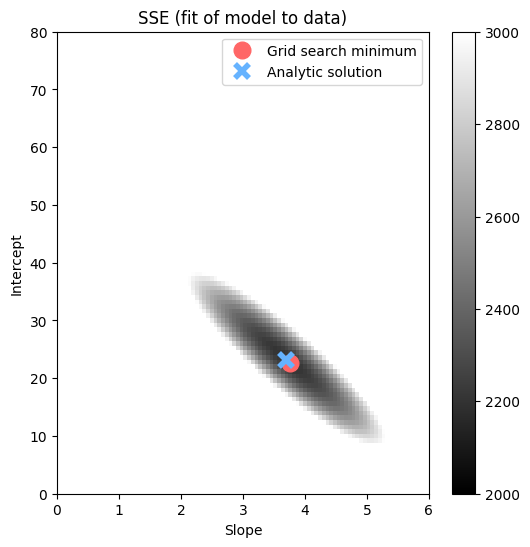

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(SSEs,vmin=2000,vmax=3000,
           extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]],
           origin='lower',aspect='auto',cmap='gray')
plt.plot(empSlope,empIntercept,'o',color=[1,.4,.4],markersize=12,label='Grid search minimum')
plt.plot(beta[1],beta[0],'x',color=[.4,.7,1],markeredgewidth=4,markersize=10,label='Analytic solution')
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('SSE (fit of model to data)')
plt.legend()

In [9]:
print('Analytic result: ')
print(f'   Intercept: {beta[0]:.2f}, slope: {beta[1]:.2f}')
print(' ')
print('Empirical result: ')
print(f'   Intercept: {empIntercept:.2f}, slope: {empSlope:.2f}')

Analytic result: 
   Intercept: 23.13, slope: 3.70
 
Empirical result: 
   Intercept: 22.63, slope: 3.76
